<a href="https://colab.research.google.com/github/xiaobo-fu/python_for_finance/blob/master/automated_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/G/ML/python_for_finance/source/"
CHAPTER_ID = "python_for_finance"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
pip install fxcmpy

In [0]:
import fxcmpy
token = open('/content/gdrive/My Drive/G/ML/python_for_finance/token.txt').read() 
api = fxcmpy.fxcmpy(access_token=token, log_level='error')

In [0]:
api.subscribe_market_data('GBP/USD')

In [0]:
candles = api.get_candles('GBP/USD', period='D1', number=3600)

In [0]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import plt
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline

In [0]:
p = 0.55
f = p - (1 - p)
I = 50
n = 1000

In [0]:
def run_simulation(f):
    c = np.zeros((n, I))
    c[0] = 100
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1, p)
            if o > 0:
                c[t, i] = (1 + f) * c[t - 1, i]
            else:
                c[t, i] = (1 - f) * c[t - 1, i]
    return c

In [9]:
c_1 = run_simulation(f)
c_1.round(2)

array([[1.0000000e+02, 1.0000000e+02, 1.0000000e+02, ..., 1.0000000e+02,
        1.0000000e+02, 1.0000000e+02],
       [9.0000000e+01, 9.0000000e+01, 1.1000000e+02, ..., 9.0000000e+01,
        9.0000000e+01, 9.0000000e+01],
       [9.9000000e+01, 9.9000000e+01, 1.2100000e+02, ..., 9.9000000e+01,
        9.9000000e+01, 8.1000000e+01],
       ...,
       [7.6046936e+05, 1.3742890e+04, 1.6625000e+02, ..., 1.1244190e+04,
        3.7482550e+04, 6.1585400e+03],
       [8.3651629e+05, 1.2368600e+04, 1.4963000e+02, ..., 1.2368600e+04,
        4.1230800e+04, 5.5426800e+03],
       [9.2016792e+05, 1.1131740e+04, 1.3467000e+02, ..., 1.3605470e+04,
        4.5353880e+04, 4.9884100e+03]])

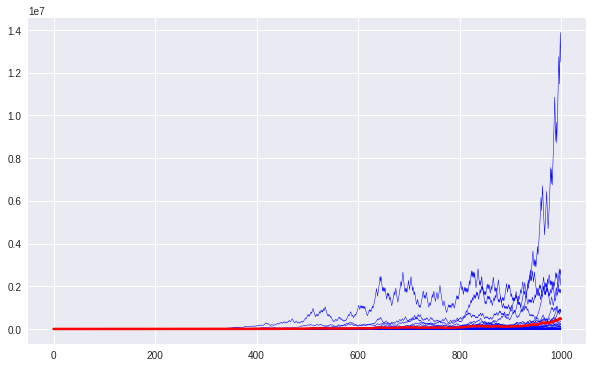

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5);

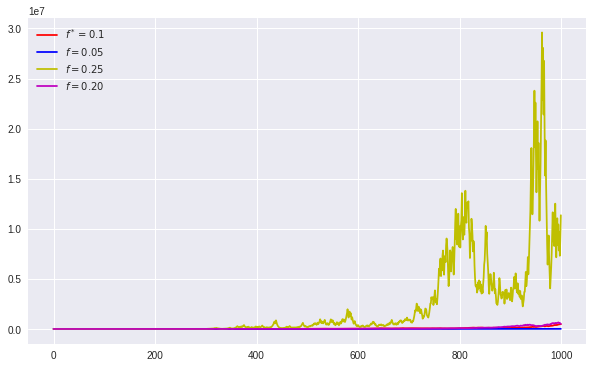

In [11]:
c_2 = run_simulation(0.05)
c_3 = run_simulation(0.25)
c_4 = run_simulation(0.11)
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.20$')
plt.legend(loc=0);

In [0]:
data = pd.DataFrame(candles)

In [13]:
data['returns'] = np.log(data['bidclose'] / data['bidclose'].shift(1))
data.dropna(inplace=True)
data.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,returns
date,,,,,,,,,,
2019-05-14 21:00:00,1.29560,1.29022,1.29703,1.28934,1.29575,1.29052,1.29710,1.29038,543355,-0.004161
2019-05-15 21:00:00,1.29021,1.28396,1.29228,1.28257,1.29052,1.28433,1.29235,1.28267,229828,-0.004864
2019-05-16 21:00:00,1.28396,1.27925,1.28535,1.27874,1.28433,1.27993,1.28559,1.27881,245751,-0.003675
2019-05-17 21:00:00,1.27924,1.27140,1.27977,1.27096,1.27993,1.27239,1.28048,1.27151,280681,-0.006155
2019-05-20 21:00:00,1.27328,1.27201,1.27569,1.27143,1.27334,1.27247,1.27577,1.27151,169347,0.000480


In [0]:
mu = data.returns.mean() * 252

In [15]:
mu

-0.02758787382817424

In [0]:
sigma = data.returns.std() * 252 ** 0.5

In [17]:
sigma

0.09130317298982515

In [0]:
r = 0.0

In [0]:
f = (mu - r) / sigma ** 2

In [20]:
f

-3.30937887333153

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



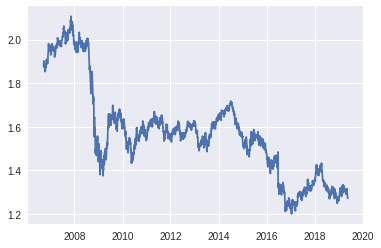

In [21]:
plt.plot(data['bidclose'])

In [0]:
equs = []

In [0]:
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * \
            math.exp(data['returns'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - \
            data[cap].loc[t_1] + \
            data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f

In [0]:
kelly_strategy(f * 0.5)
kelly_strategy(f * 0.66)
kelly_strategy(f)

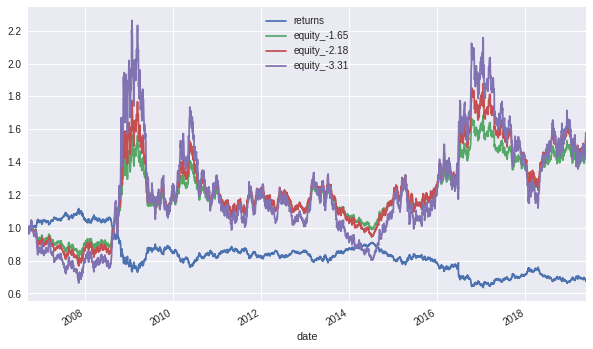

In [25]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True,
    figsize=(10, 6))
data[equs].plot(ax=ax, legend=True);

In [0]:
data = api.get_candles('GBP/USD', period='D1', number=10000)

In [27]:
spread = (data['askclose'] - data['bidclose']).mean()
spread

0.0005627440476190474

In [0]:
data['midclose'] = (data['askclose'] + data['bidclose']) / 2

In [29]:
ptc = spread / data['midclose'].mean()
ptc

0.0003511054775190936

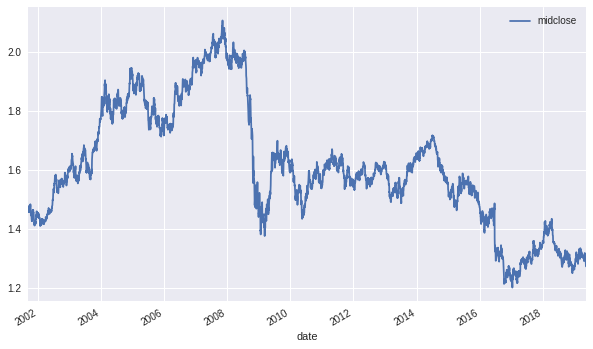

In [30]:
data['midclose'].plot(figsize=(10, 6), legend=True);

In [0]:
data['returns'] = np.log(data['midclose'] / data['midclose'].shift(1))

In [0]:
data.dropna(inplace=True)
lags = 33
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['returns'].shift(lag)
    cols.append(col)

In [0]:
data.dropna(inplace=True)

In [0]:
data[cols] = np.where(data[cols] > 0, 1, 0)

In [0]:
data['direction'] = np.where(data['returns'] > 0, 1, -1)

In [0]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [0]:
mu = data['returns'].mean()
v = data['returns'].std()

In [38]:
bins = [mu - v, mu, mu + v]
bins

[-0.00555403698744514, -2.295173634912807e-05, 0.005508133514746884]

In [0]:
create_bins(data, bins)

In [0]:
data.dropna(inplace=True)

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(data, test_size=0.5,
    shuffle=False, random_state=1)

In [0]:
#train = train.copy().sort_index()

In [0]:
#test = test.copy().sort_index()

In [0]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=2 * [250],
    random_state=1)

In [48]:
%time model.fit(train[cols_bin], train['direction'])

CPU times: user 26.6 s, sys: 17.9 s, total: 44.5 s
Wall time: 22.5 s


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[250, 250], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
accuracy_score(train['direction'], model.predict(train[cols]))

0.5709149021174591

In [0]:
#test = data.iloc[split:].copy()

In [0]:
test['position'] = model.predict(test[cols])

In [52]:
accuracy_score(test['direction'], test['position'])

0.5073911306432282

In [0]:
test['strategy'] = test['position'] * test['returns']

In [54]:
sum(test['position'].diff() != 0)

559

In [0]:
test['strategy_tc'] = np.where(test['position'].diff() != 0,
    test['strategy'] - ptc,
    test['strategy'])

In [56]:
test[['returns', 'strategy', 'strategy_tc']].sum(
).apply(np.exp)

returns        0.807365
strategy       1.371980
strategy_tc    1.127482
dtype: float64

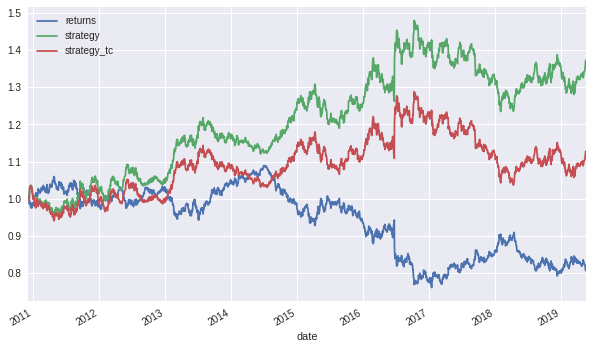

In [57]:
test[['returns', 'strategy', 'strategy_tc']].cumsum(
).apply(np.exp).plot(figsize=(10, 6));

In [58]:
mean = test[['returns', 'strategy_tc']].mean() * len(data) * 12
mean

returns       -5.135521
strategy_tc    2.879694
dtype: float64

In [59]:
var = test[['returns', 'strategy_tc']].var() * len(data) * 12
var

returns        1.540132
strategy_tc    1.541218
dtype: float64

In [60]:
vol = var ** 0.5
vol

returns        1.241021
strategy_tc    1.241458
dtype: float64

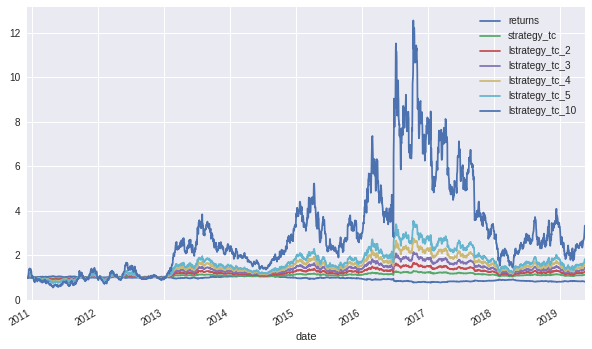

In [61]:
to_plot = ['returns', 'strategy_tc']
for lev in [2, 3, 4, 5, 10]:
    label = 'lstrategy_tc_%d' % lev
    test[label] = test['strategy_tc'] * lev
    to_plot.append(label)
test[to_plot].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [0]:
equity = 10000

In [0]:
risk = pd.DataFrame(test['lstrategy_tc_10'])

In [0]:
risk['equity'] = risk['lstrategy_tc_10'].cumsum(
    ).apply(np.exp) * equity

In [0]:
risk['cummax'] = risk['equity'].cummax()

In [0]:
risk['drawdown'] = risk['cummax'] - risk['equity']

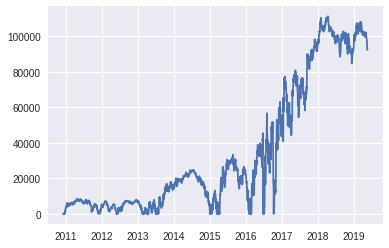

In [80]:
plt.plot(risk['drawdown'])

In [81]:
risk['drawdown'].max()

111201.3509243692

In [82]:
t_max = risk['drawdown'].idxmax()
t_max

Timestamp('2018-04-12 21:00:00')

In [0]:
temp = risk['drawdown'][risk['drawdown'] == 0]

In [0]:
periods = (temp.index[1:].to_pydatetime() -
    temp.index[:-1].to_pydatetime())

In [85]:
periods[20:30]

array([datetime.timedelta(1), datetime.timedelta(1),
       datetime.timedelta(1), datetime.timedelta(1),
       datetime.timedelta(1, 82800), datetime.timedelta(1),
       datetime.timedelta(1), datetime.timedelta(27),
       datetime.timedelta(9), datetime.timedelta(2)], dtype=object)

In [87]:
t_per = periods.max()
t_per

datetime.timedelta(521, 3600)

In [88]:
t_per.seconds / 60 / 60

1.0

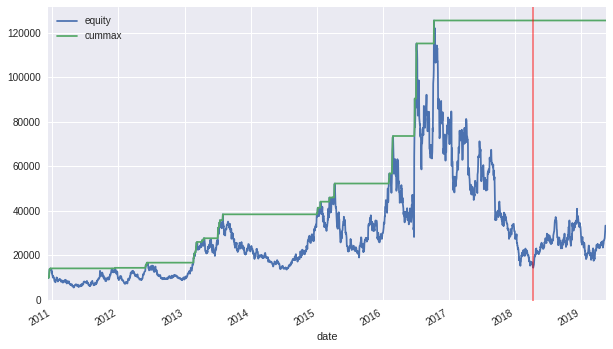

In [89]:
risk[['equity', 'cummax']].plot(figsize=(10, 6))
plt.axvline(t_max, c='r', alpha=0.5);

In [0]:
import pickle

In [0]:
pickle.dump(model, open('/content/gdrive/My Drive/G/ML/python_for_finance/algorithm.pkl', 'wb'))

In [0]:
algorithm = pickle.load(open('/content/gdrive/My Drive/G/ML/python_for_finance/algorithm.pkl', 'rb'))

In [95]:
algorithm

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[250, 250], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
sel = ['tradeId', 'amountK', 'currency',
    'grossPL', 'isBuy']

In [0]:
def print_positions(pos):
    print('\n\n' + 50 * '=')
    print('Going {}.\n'.format(pos))
    time.sleep(1.5)
    print(api.get_open_positions()[sel])
    print(50 * '=' + '\n\n')

In [0]:
symbol = 'GBP/USD'
bar = '15s'
amount = 100
position = 0
min_bars = lags + 1
df = pd.DataFrame()

In [0]:
def automated_strategy(data, dataframe):
    global min_bars, position, df
    ldf = len(dataframe)
    df = dataframe.resample(bar, label='right').last().ffill()
    if ldf % 20 == 0:
        print('%3d' % len(dataframe), end=',')
    
    if len(df) > min_bars:
        min_bars = len(df)
        df['Mid'] = df[['Bid', 'Ask']].mean(axis=1)
        df['Returns'] = np.log(df['Mid'] / df['Mid'].shift(1))
        df['Direction'] = np.where(df['Returns'] > 0, 1, -1)
        features = df['Direction'].iloc[-(lags + 1):-1]
        features = features.values.reshape(1, -1)
        signal = algorithm.predict(features)[0]
        
        if position in [0, -1] and signal == 1:
            api.create_market_buy_order(
                symbol, amount - position * amount)
            position = 1
            print_positions('LONG')
        
        elif position in [0, 1] and signal == -1:
            api.create_market_sell_order(
                symbol, amount + position * amount)
            position = -1
            print_positions('SHORT')
    
    if len(dataframe) > 350:
        api.unsubscribe_market_data('GBP/USD')
        api.close_all()

In [0]:
api.subscribe_market_data('GBP/USD')

In [143]:
api.get_last_price('GBP/USD')

Bid     1.27062
Ask     1.27090
High    1.27114
Low     1.26983
Name: 2019-05-21 21:16:45.873000, dtype: float64

In [0]:
data = api.get_candles('GBP/USD', period='D1', number=5040)

In [0]:
today = data[-1:]
data = data.append(today)

In [148]:
data.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-05-16 21:00:00,1.28396,1.27925,1.28535,1.27874,1.28433,1.27993,1.28559,1.27881,245751
2019-05-17 21:00:00,1.27924,1.27140,1.27977,1.27096,1.27993,1.27239,1.28048,1.27151,280681
2019-05-20 21:00:00,1.27328,1.27201,1.27569,1.27143,1.27334,1.27247,1.27577,1.27151,169347
2019-05-21 21:00:00,1.27201,1.27038,1.28129,1.26848,1.27247,1.27059,1.28155,1.26856,514083
2019-05-21 21:00:00,1.27201,1.27038,1.28129,1.26848,1.27247,1.27059,1.28155,1.26856,514083


In [0]:
def datappr(data,lags):
    data['returns'] = np.log(data['bidclose'] / data['bidclose'].shift(1))
    data.dropna(inplace=True)
    global cols
    cols = []
    
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)
    
    data.dropna(inplace=True)

    data[cols] = np.where(data[cols] > 0, 1, -1)

    data['direction'] = np.where(data['returns'] > 0, 1, -1)

    mu = data['returns'].mean()
    v = data['returns'].std()
    bins = [mu - v, mu, mu + v]
    
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [0]:
datappr(data,14)

In [0]:
train, test = train_test_split(data, test_size=0.5,
    shuffle=False, random_state=1)

In [0]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=2 * [250],
    random_state=1)

In [154]:
%time model.fit(train[cols_bin], train['direction'])

CPU times: user 28.5 s, sys: 19.8 s, total: 48.3 s
Wall time: 24.3 s


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[250, 250], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
test['position'] = model.predict(test[cols])

In [158]:
accuracy_score(test['direction'], test['position'])

0.5041782729805014

In [160]:
test[-10:]

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,direction,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin,lag_6_bin,lag_7_bin,lag_8_bin,lag_9_bin,lag_10_bin,lag_11_bin,lag_12_bin,lag_13_bin,lag_14_bin,position
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-09 21:00:00,1.30044,1.29970,1.30353,1.29670,1.30076,1.30111,1.30365,1.29679,347659,-0.000569,-1,-1,-1,1,-1,1,1,1,1,-1,-1,-1,-1,1,-1,0,0,0,3,0,3,3,3,3,0,0,0,0,3,-1
2019-05-10 21:00:00,1.29970,1.29997,1.30471,1.29907,1.30111,1.30063,1.30480,1.29915,324796,0.000208,-1,-1,-1,-1,1,-1,1,1,1,1,-1,-1,-1,-1,1,0,0,0,0,3,0,3,3,3,3,0,0,0,0,-1
2019-05-13 21:00:00,1.30091,1.29560,1.30404,1.29406,1.30104,1.29575,1.30414,1.29418,280896,-0.003367,1,-1,-1,-1,-1,1,-1,1,1,1,1,-1,-1,-1,-1,3,0,0,0,0,3,0,3,3,3,3,0,0,0,-1
2019-05-14 21:00:00,1.29560,1.29022,1.29703,1.28934,1.29575,1.29052,1.29710,1.29038,543355,-0.004161,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,-1,-1,-1,0,3,0,0,0,0,3,0,3,3,3,3,0,0,1
2019-05-15 21:00:00,1.29021,1.28396,1.29228,1.28257,1.29052,1.28433,1.29235,1.28267,229828,-0.004864,-1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,-1,-1,0,0,3,0,0,0,0,3,0,3,3,3,3,0,1
2019-05-16 21:00:00,1.28396,1.27925,1.28535,1.27874,1.28433,1.27993,1.28559,1.27881,245751,-0.003675,-1,-1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,-1,0,0,0,3,0,0,0,0,3,0,3,3,3,3,-1
2019-05-17 21:00:00,1.27924,1.27140,1.27977,1.27096,1.27993,1.27239,1.28048,1.27151,280681,-0.006155,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,-1,0,0,0,0,3,0,0,0,0,3,0,3,3,3,1
2019-05-20 21:00:00,1.27328,1.27201,1.27569,1.27143,1.27334,1.27247,1.27577,1.27151,169347,0.000480,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,0,0,0,0,0,3,0,0,0,0,3,0,3,3,1
2019-05-21 21:00:00,1.27201,1.27038,1.28129,1.26848,1.27247,1.27059,1.28155,1.26856,514083,-0.001282,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,3,0,0,0,0,0,3,0,0,0,0,3,0,3,-1


In [0]:
test = 0
train = 0

In [0]:
raw = api.get_candles('GBP/USD', period='D1', number=5040)

In [0]:
def match(raw, rounds):
    global score
    score = []
    

    for i in range(2, rounds):
        data = pd.DataFrame(raw)
        datappr(data, i)
        train, test = train_test_split(data, test_size=0.5, shuffle=False, random_state=42)
        model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=2 * [250], random_state=1)
        model.fit(train[cols_bin], train['direction'])
        test['position'] = model.predict(test[cols])
        print(i);print(accuracy_score(test['direction'], test['position']))
        score.append(accuracy_score(test['direction'], test['position']))
        test['strategy'] = test['position'] * test['returns']
        fig = plt.figure(figsize =(10,6))
        plt.plot(test['strategy'].cumsum(),label = i)
        plt.title('Lag %d, Score:%.4f'%(i,
                                      accuracy_score(
                                          test['direction'], test['position'])
                                           
                                     )
                 )
        plt.show()

2
0.49027391822151645


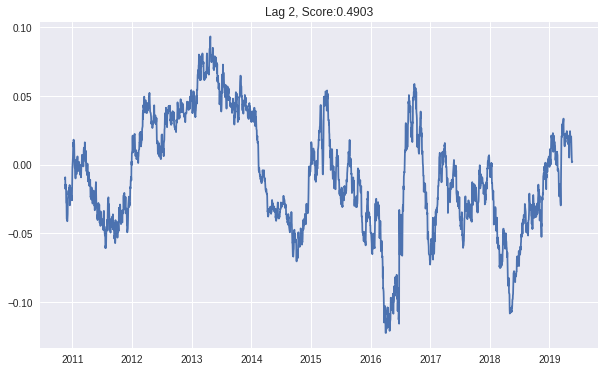

3
0.5135027799841144


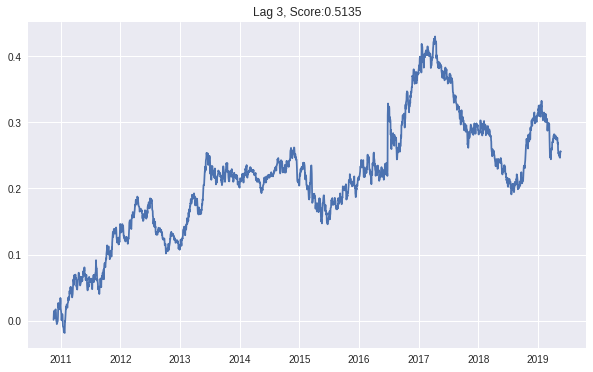

4
0.494440031771247


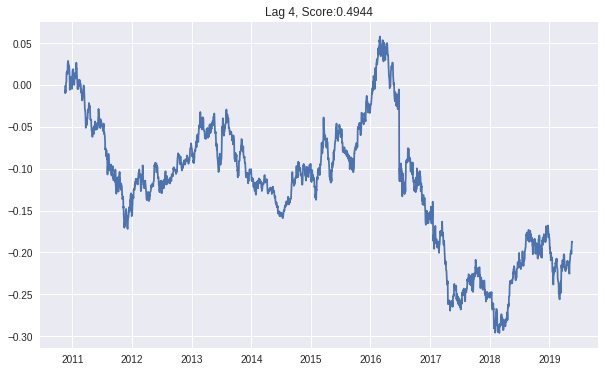

5
0.5053635280095352


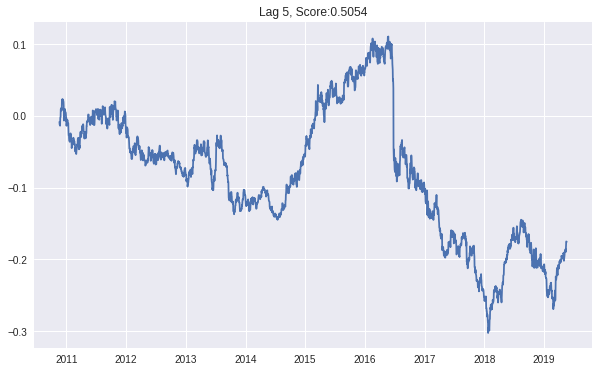

6
0.49304727850615815


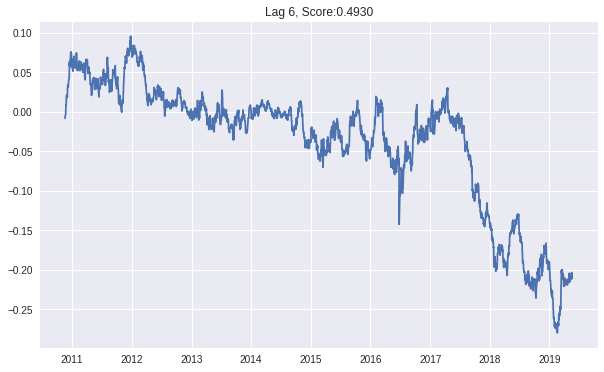

7
0.49761526232114467


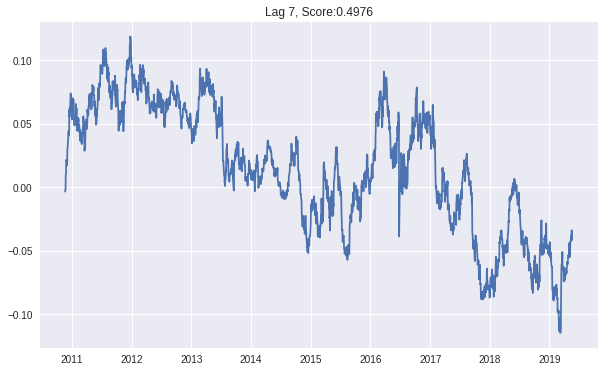

8
0.5071542130365659


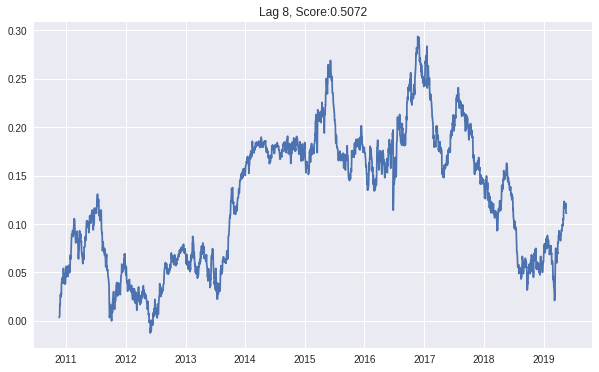

9
0.4886679920477137


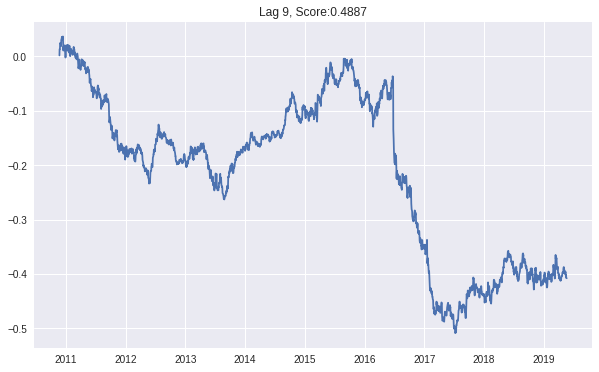

10
0.4922465208747515


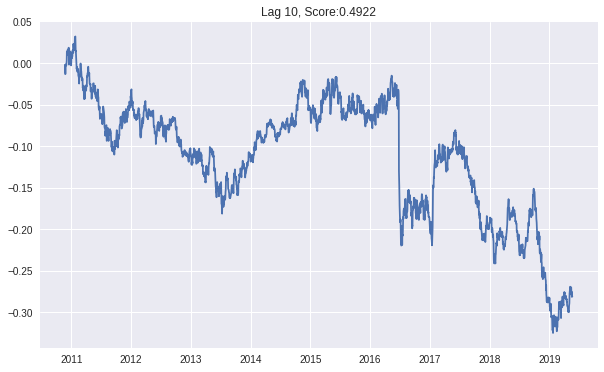

11
0.4888623707239459


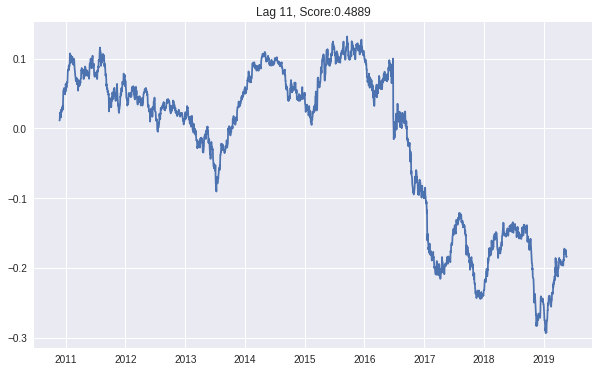

12
0.5


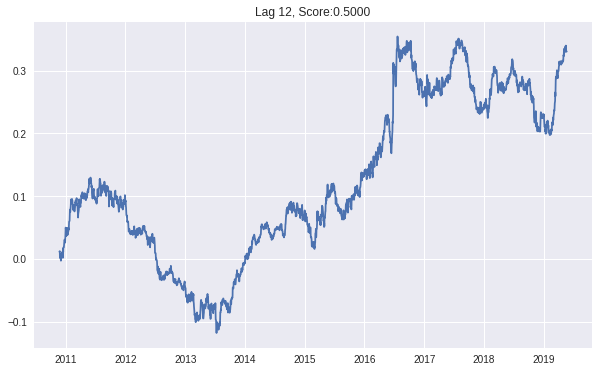

13
0.4942300039793076


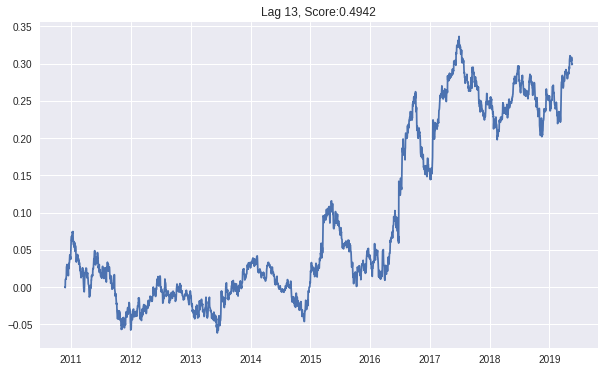

14
0.5121368881814564


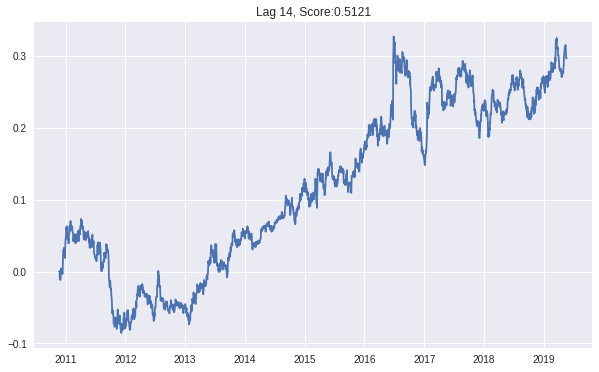

15
0.5071656050955414


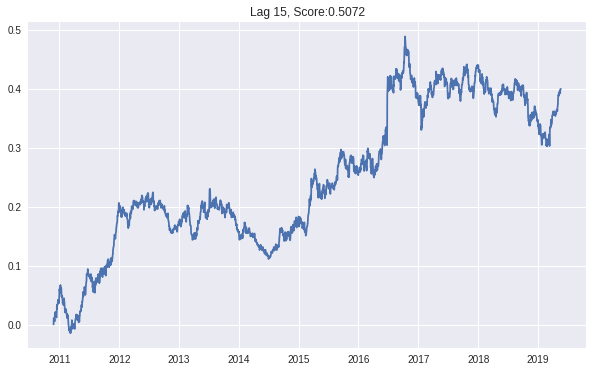

16
0.491640127388535


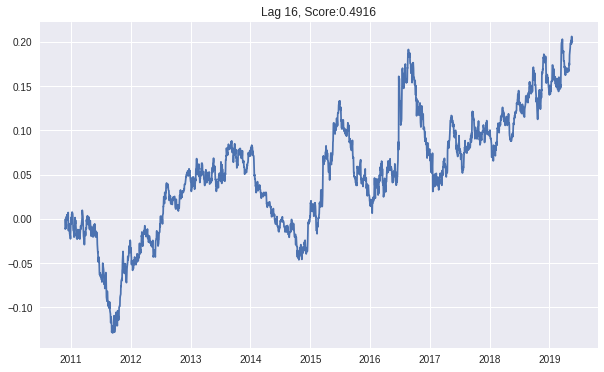

17
0.4834727200318598


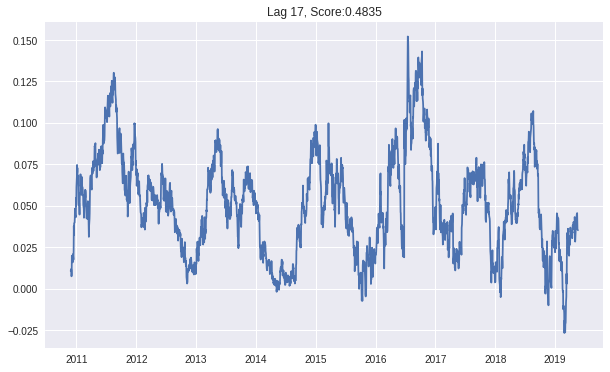

18
0.5009956192751892


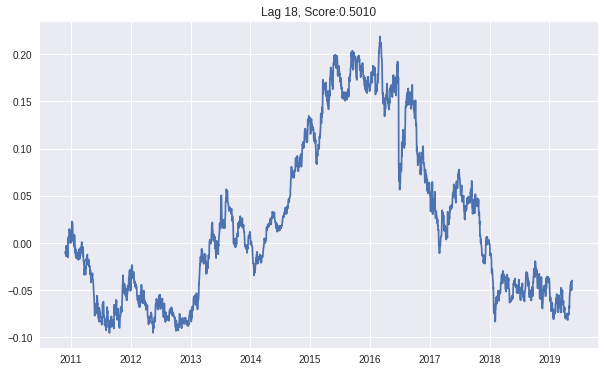

19
0.49721115537848604


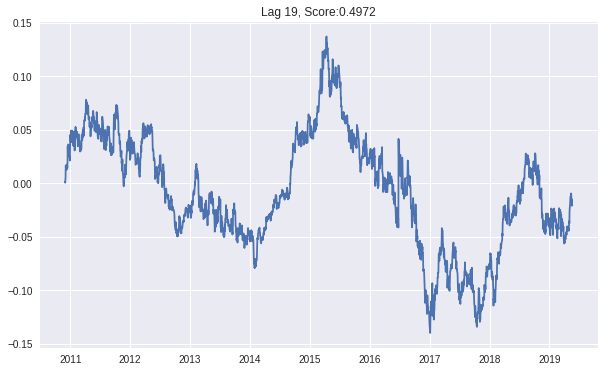

20
0.5155378486055777


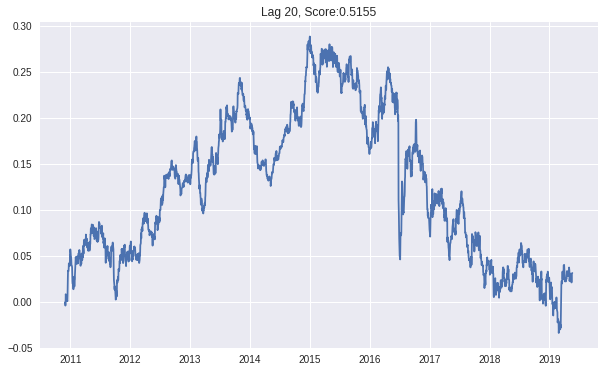

21
0.4966121960940614


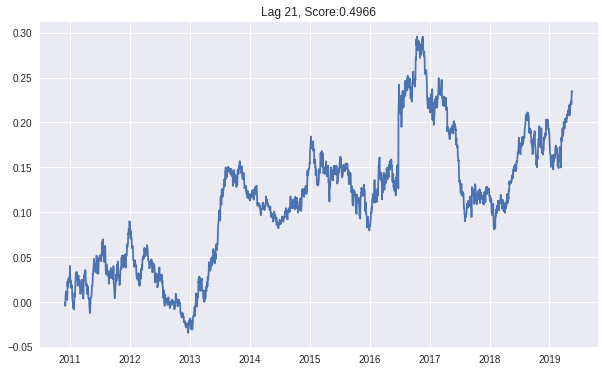

22
0.5017935432443205


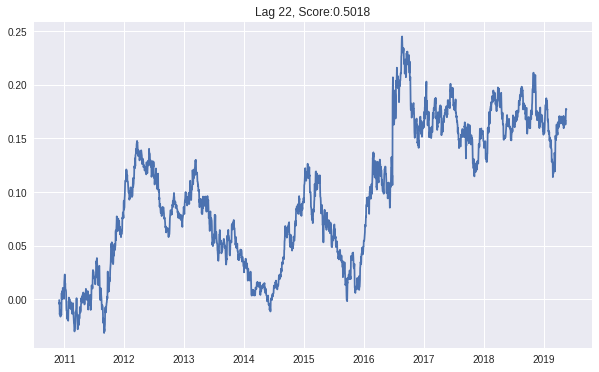

23
0.4956140350877193


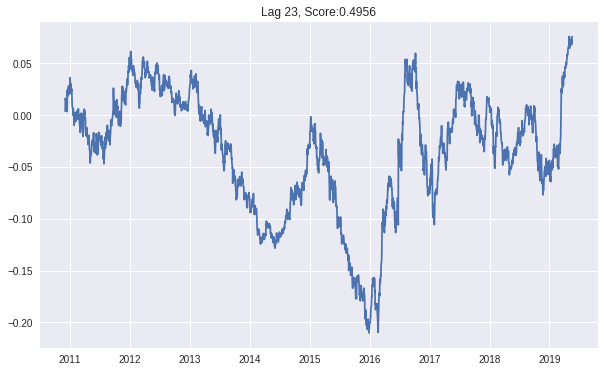

24
0.4964114832535885


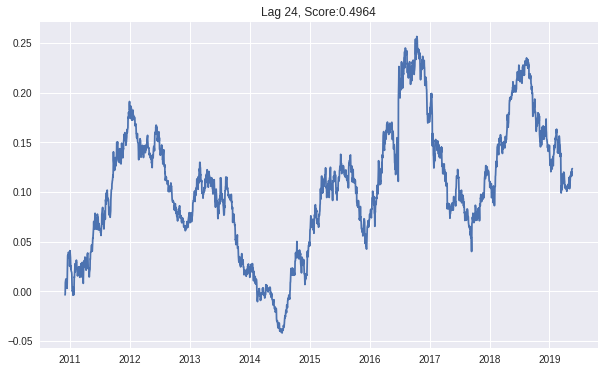

25
0.5073793378540088


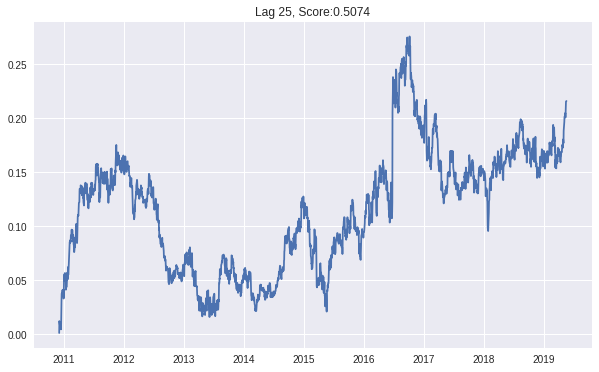

26
0.4878340646190666


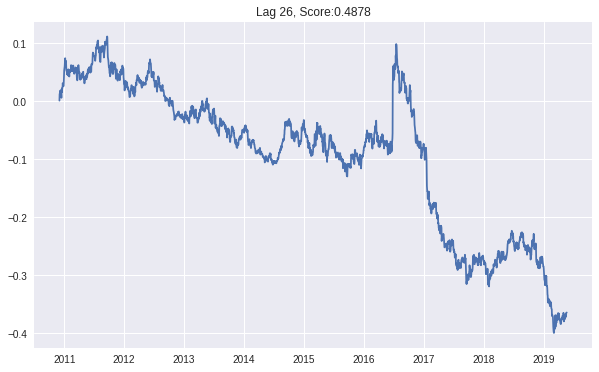

27
0.49002394253790904


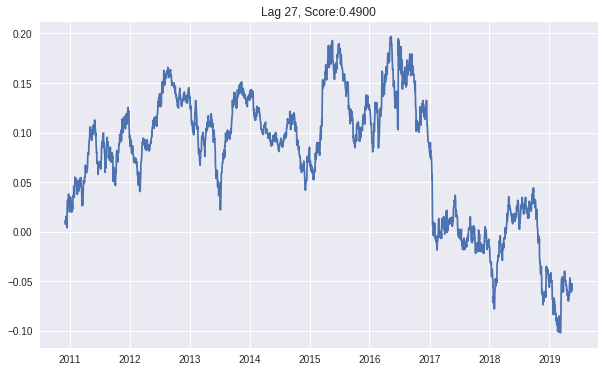

28
0.5195530726256983


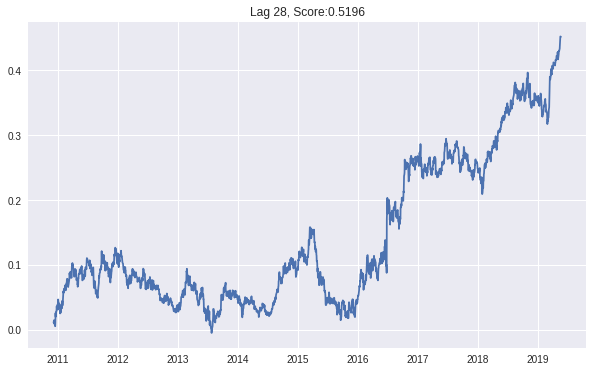

29
0.4998003992015968


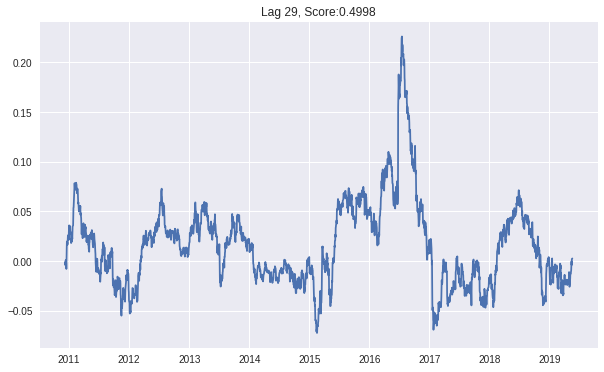

30
0.49740518962075847


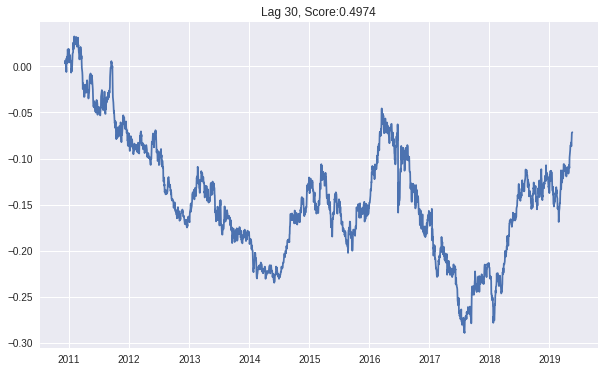

31
0.49201277955271566


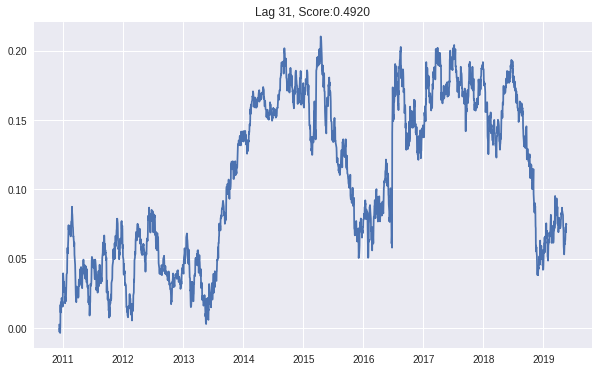

32
0.4960063897763578


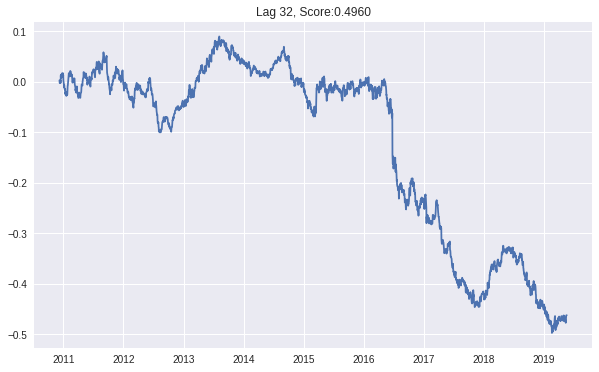

33
0.48501797842588895


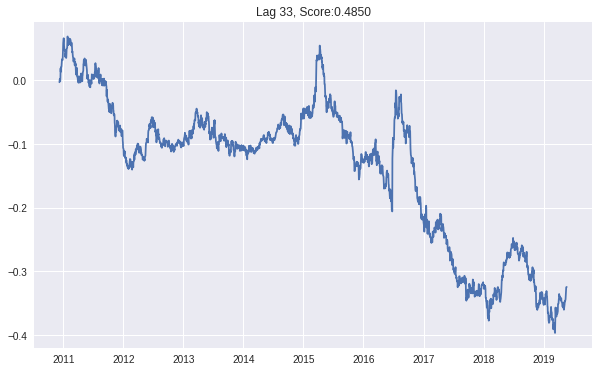

34
0.5093887335197763


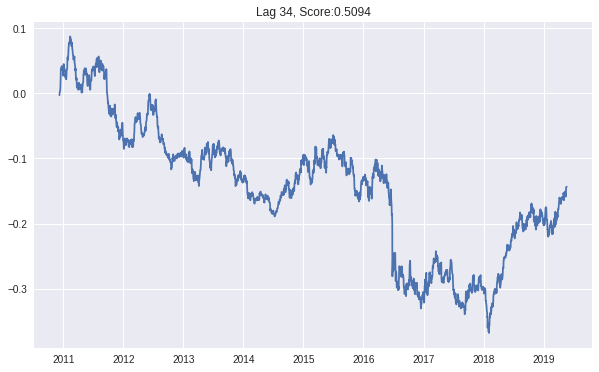

35
0.4988009592326139


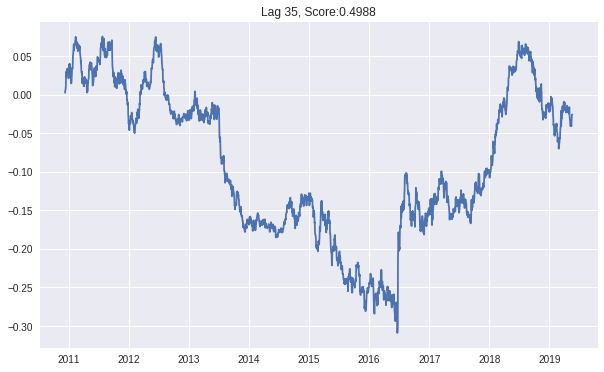

36
0.4980015987210232


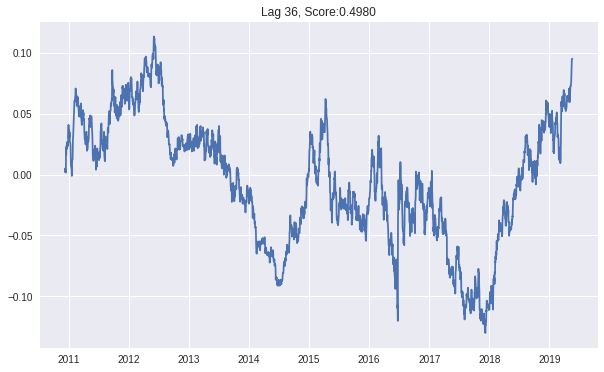

37
0.5065973610555777


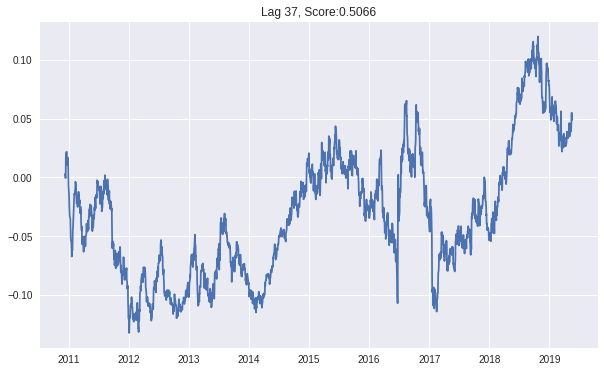

38
0.49780087964814074


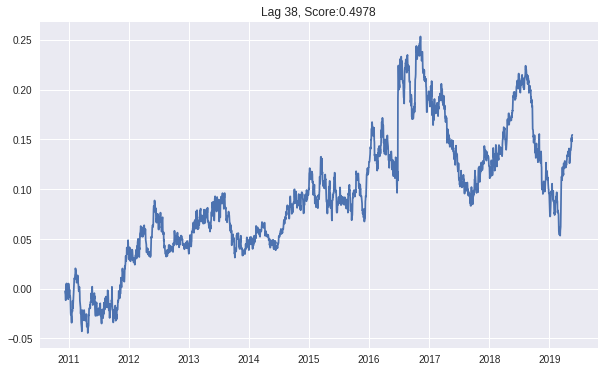

39
0.5148


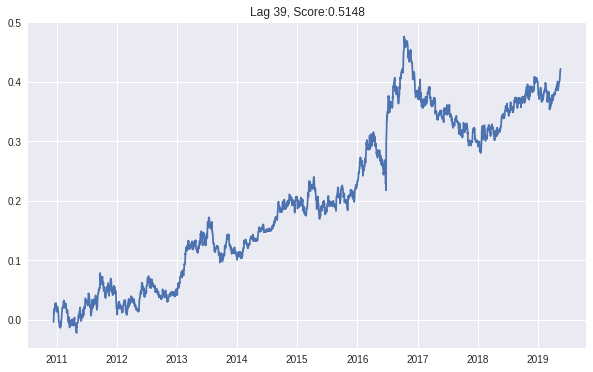

40
0.4996


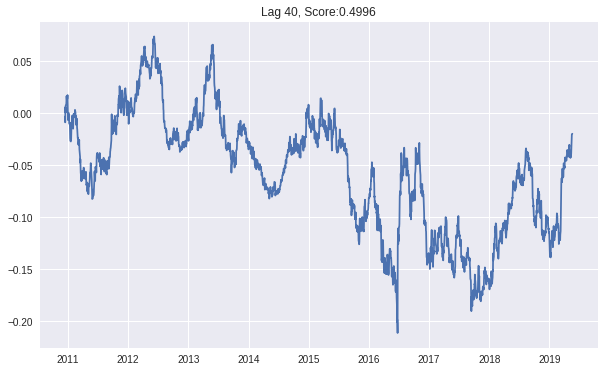

41
0.5070028011204482


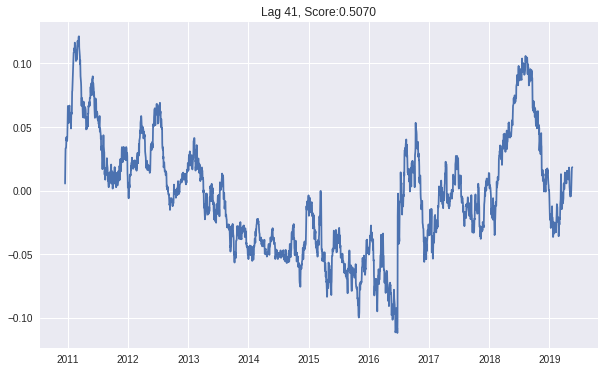

42
0.4957983193277311


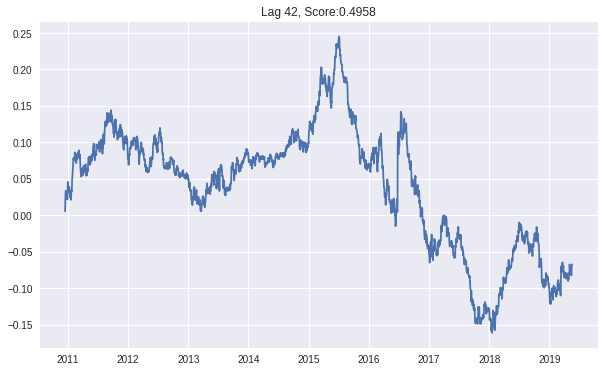

43
0.4975980784627702


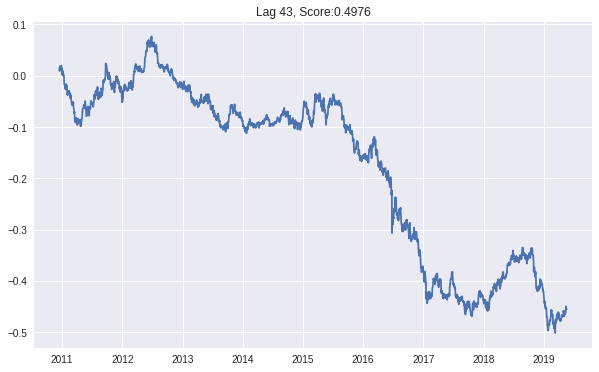

44
0.4919935948759007


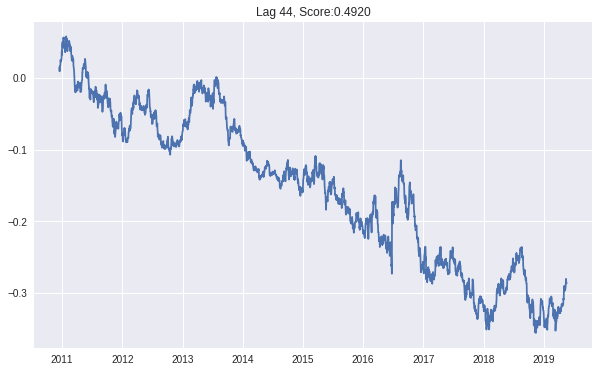

45
0.49018822587104527


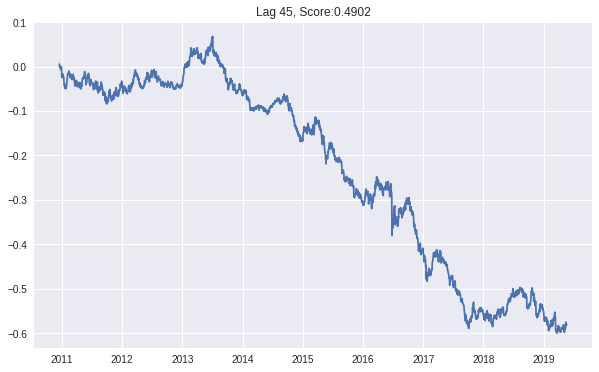

46
0.5110132158590308


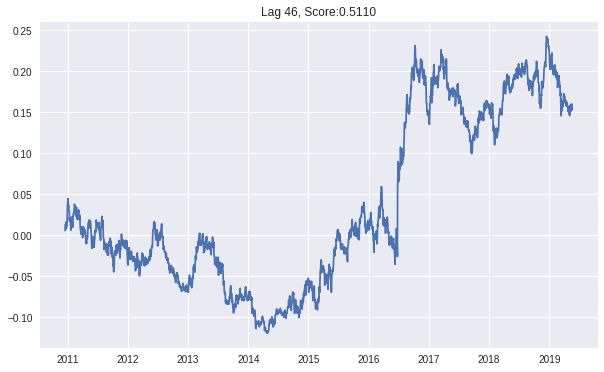

47
0.500801282051282


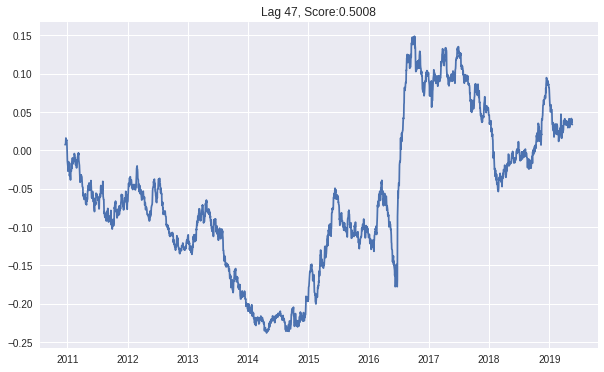

48
0.5120192307692307


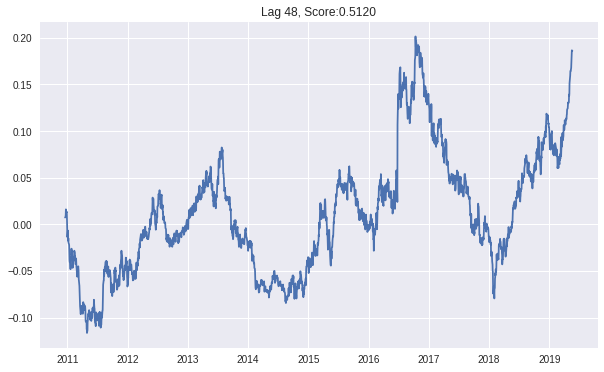

49
0.49498997995991983


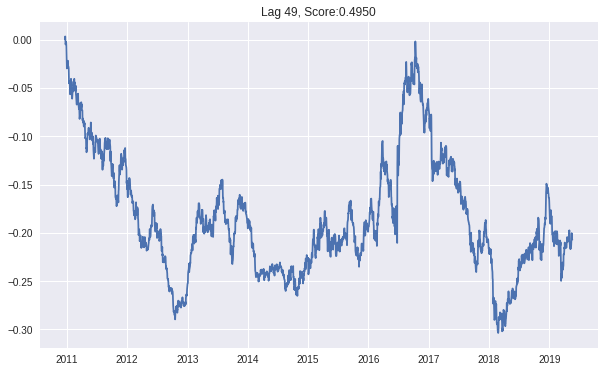

50
0.49539078156312627


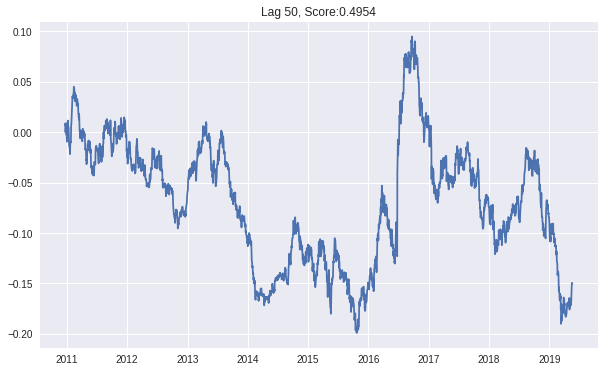

51
0.4995990376904571


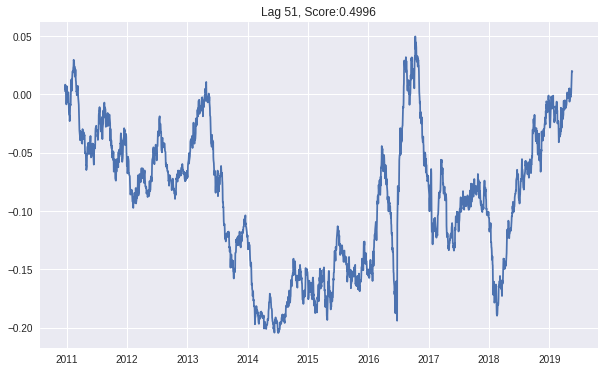

52
0.4911788291900561


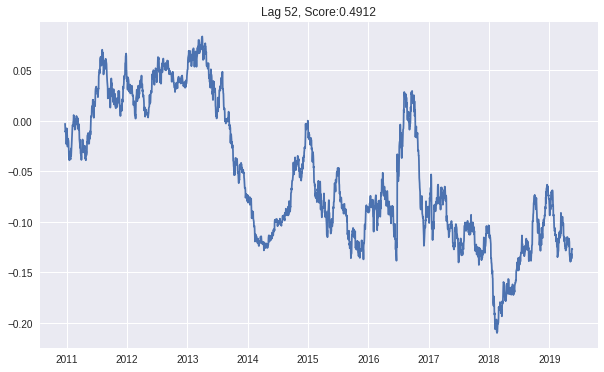

53
0.4905736060970718


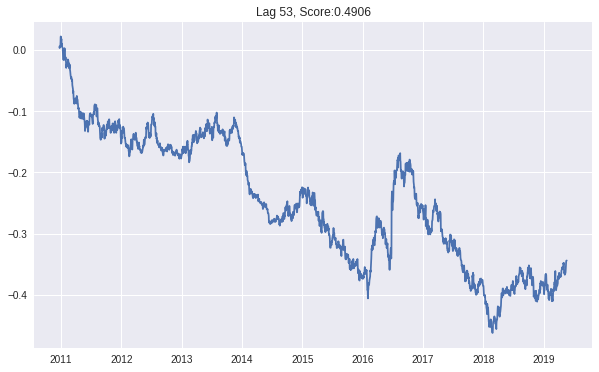

54
0.49578820697954273


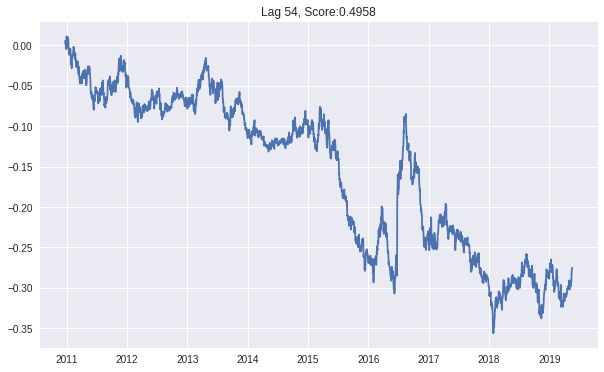

55
0.49398073836276085


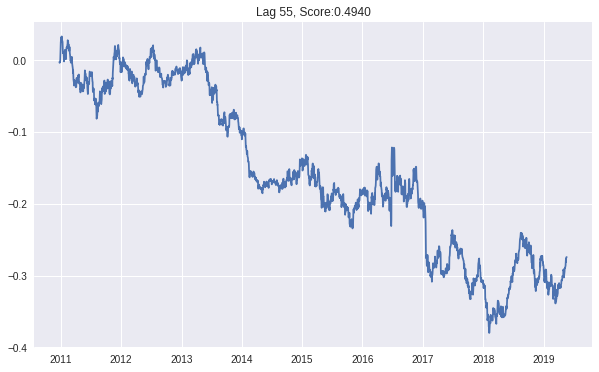

KeyboardInterrupt: ignored

In [141]:
match(raw, 99)

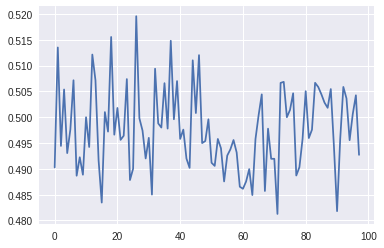

In [54]:
plt.plot(score)

In [0]:
data = pd.DataFrame(raw)
datappr(data, 99)
train, test = train_test_split(data, test_size=0.5, shuffle=False, random_state=42)
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=2 * [250], random_state=1)
model.fit(train[cols_bin], train['direction'])
test['position'] = model.predict(test[cols])

In [0]:
test['strategy'] = test['position'] * test['returns']

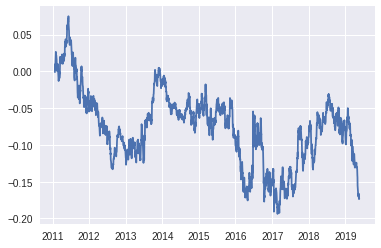

In [59]:
plt.plot(test['strategy'].cumsum())